In [5]:
"""
@author Rahul Gupta
"""

import string
import re
import tweepy
import json
import twitterClient
from collections import Counter
import networkx as nx

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import opinion_lexicon

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from scipy.stats.stats import pearsonr

from colorama import Fore, Style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)  
pd.options.display.max_colwidth = 200

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [8]:
## Extension 1.1: Reddit Sentiment Analysis

In [9]:
"""
@author Megha Mohan
"""
import praw
import time
import random
import sys
import csv
import math
import numpy as np
import pandas as pd
from collections import Counter
import networkx as nx

import nltk
nltk.download('punkt')

from colorama import Fore, Style

import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from IPython.display import display
from IPython.display import clear_output
from pprint import pprint
from ipywidgets import IntSlider, Output
from IPython.display import clear_output
import datetime as dt
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)  
pd.options.display.max_colwidth = 200
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
reddit = praw.Reddit(client_id='PiURtsGqnsmLEA',
client_secret='JodQ8pfG4OJ1TiYQPvkjcCAlG6s',
user_agent='SocialMedia')

In [11]:
headlines = set()
for submission in reddit.subreddit('streaming').new(limit=None):
    headlines.add(submission.title)
clear_output()

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headlines'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.68,
  'headlines': 'RobBoss24 Streaming New Vegas - Dead Money DLC for a few hours!',
  'neg': 0.338,
  'neu': 0.662,
  'pos': 0.0},
 {'compound': 0.0, 'headlines': 'New streamer! Come watch me!', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0,
  'headlines': 'As Deckard Cain would say: "Stay a while and listen!"',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [13]:
df = pd.DataFrame.from_records(results)
df.head()

compound  \
0   -0.6800   
1    0.0000   
2    0.0000   
3    0.7494   
4    0.0000   

                                                                    headlines  \
0             RobBoss24 Streaming New Vegas - Dead Money DLC for a few hours!   
1                                                New streamer! Come watch me!   
2                       As Deckard Cain would say: "Stay a while and listen!"   
3  Give yourself a chance to win a prepaid gaming card on my steam! !giveaway   
4                                                    PubG and Fortnite Stream   

     neg    neu   pos  
0  0.338  0.662  0.00  
1  0.000  1.000  0.00  
2  0.000  1.000  0.00  
3  0.000  0.610  0.39  
4  0.000  1.000  0.00

In [14]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

compound  \
0   -0.6800   
1    0.0000   
2    0.0000   
3    0.7494   
4    0.0000   

                                                                    headlines  \
0             RobBoss24 Streaming New Vegas - Dead Money DLC for a few hours!   
1                                                New streamer! Come watch me!   
2                       As Deckard Cain would say: "Stay a while and listen!"   
3  Give yourself a chance to win a prepaid gaming card on my steam! !giveaway   
4                                                    PubG and Fortnite Stream   

     neg    neu   pos  label  
0  0.338  0.662  0.00     -1  
1  0.000  1.000  0.00      0  
2  0.000  1.000  0.00      0  
3  0.000  0.610  0.39      1  
4  0.000  1.000  0.00      0

In [15]:
df2 = df[['headlines','label']]

In [16]:
df2.to_csv('reddit1_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [17]:
df.label.value_counts()

 0    554
 1    353
-1     88
Name: label, dtype: int64

In [18]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headlines)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headlines)[:5], width=200)


Positive headlines:

['Give yourself a chance to win a prepaid gaming card on my steam! !giveaway',
 'New streamer looking for sub alert feedback.',
 'NEW STREAMER SUPPORT IF YOU LIKE <3',
 'Roll With It: A D&D Actual Play Live Stream Starting Now',
 "Stream very laggy, but in OBS and In-Game, it's fine."]

Negative headlines:

['RobBoss24 Streaming New Vegas - Dead Money DLC for a few hours!',
 'Headset mic too low',
 'Streaming 7 Days to Die',
 'NEW SAW DLC ! LETS SURVIVE THE PIG ATTACKS!',
 'Streaming Fallout New Vegas for about 2 hours tonight, stop on by!']


In [19]:
df.label.value_counts(normalize=True) * 100

 0    55.678392
 1    35.477387
-1     8.844221
Name: label, dtype: float64

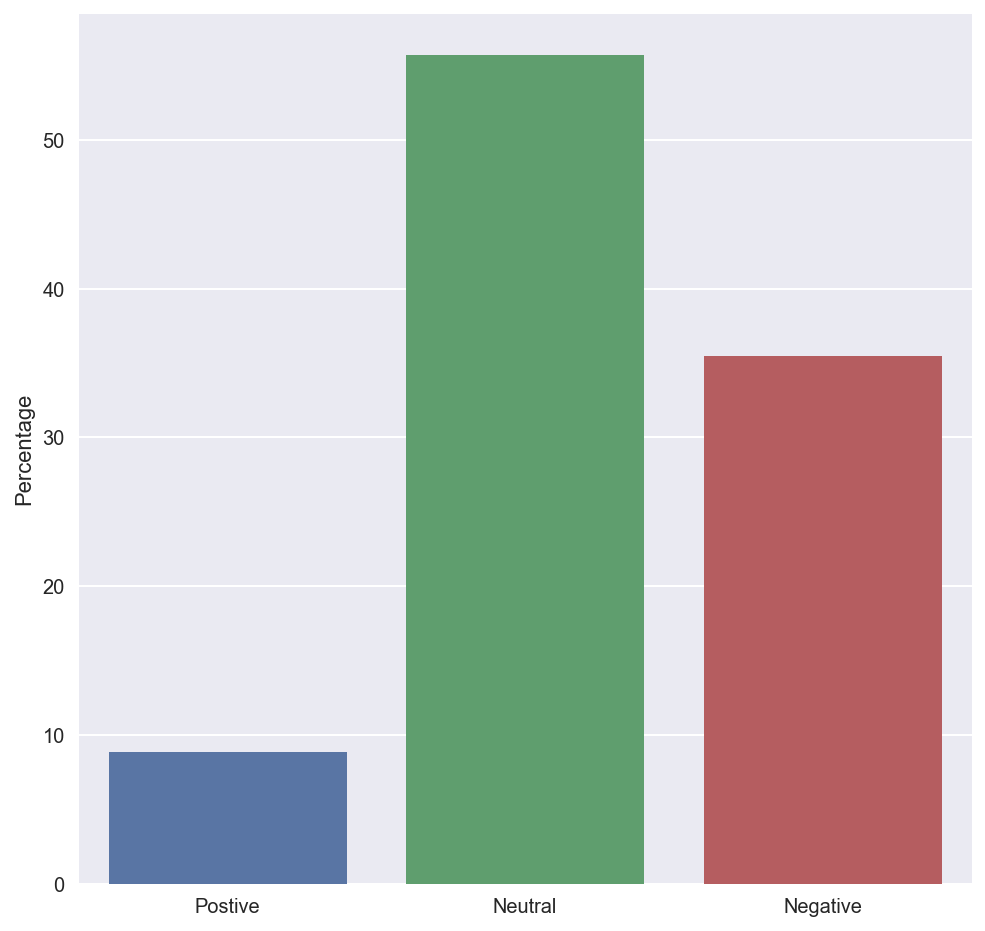

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Postive', 'Neutral', 'Negative'])
ax.set_ylabel("Percentage")
plt.show()

In [21]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [22]:
example = "Thor is the best movie ever"
print(word_tokenize(example, language='english'))

['Thor', 'is', 'the', 'best', 'movie', 'ever']


In [23]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['Thor', 'is', 'the', 'best', 'movie', 'ever']


In [24]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [25]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [26]:
pos_lines = list(df[df.label == 1].headlines)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('streaming', 83),
 ('stream', 72),
 ('help', 66),
 ('come', 53),
 ('playing', 45),
 ('new', 38),
 ('fortnite', 38),
 ('play', 29),
 ('join', 29),
 ('live', 28),
 ('twitch', 27),
 ('streamer', 26),
 ('need', 23),
 ('hours', 20),
 ('2', 19),
 ('game', 17),
 ('check', 17),
 ('friends', 16),
 ('looking', 15),
 ('best', 15)]

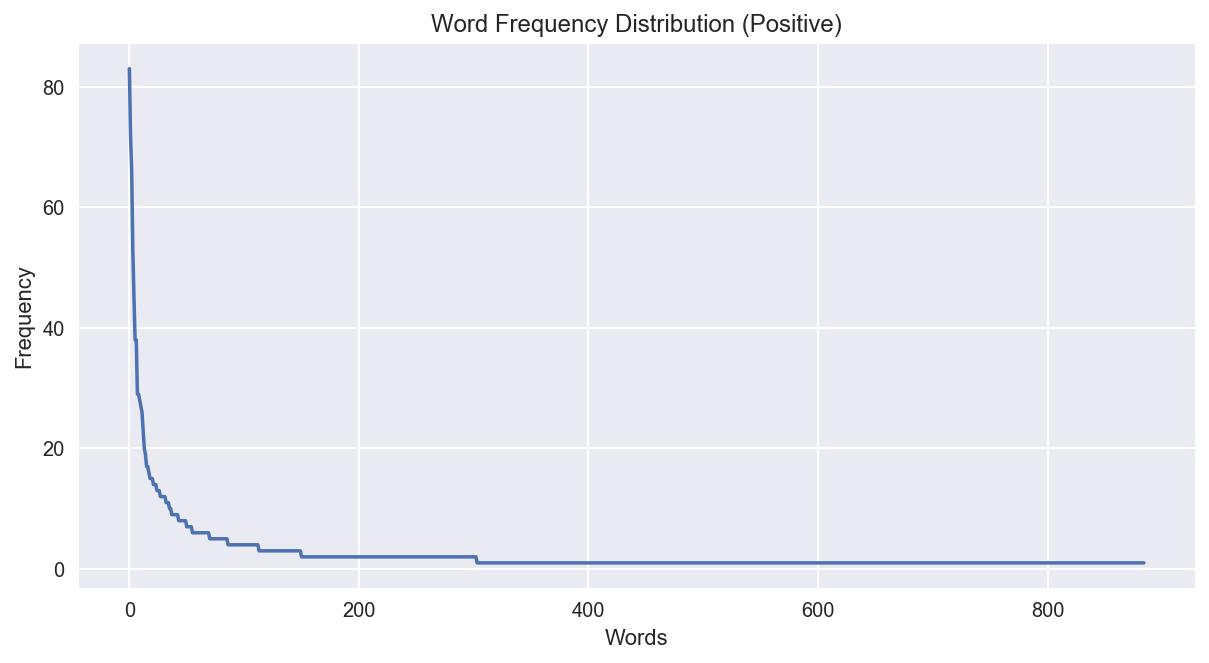

In [27]:

y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

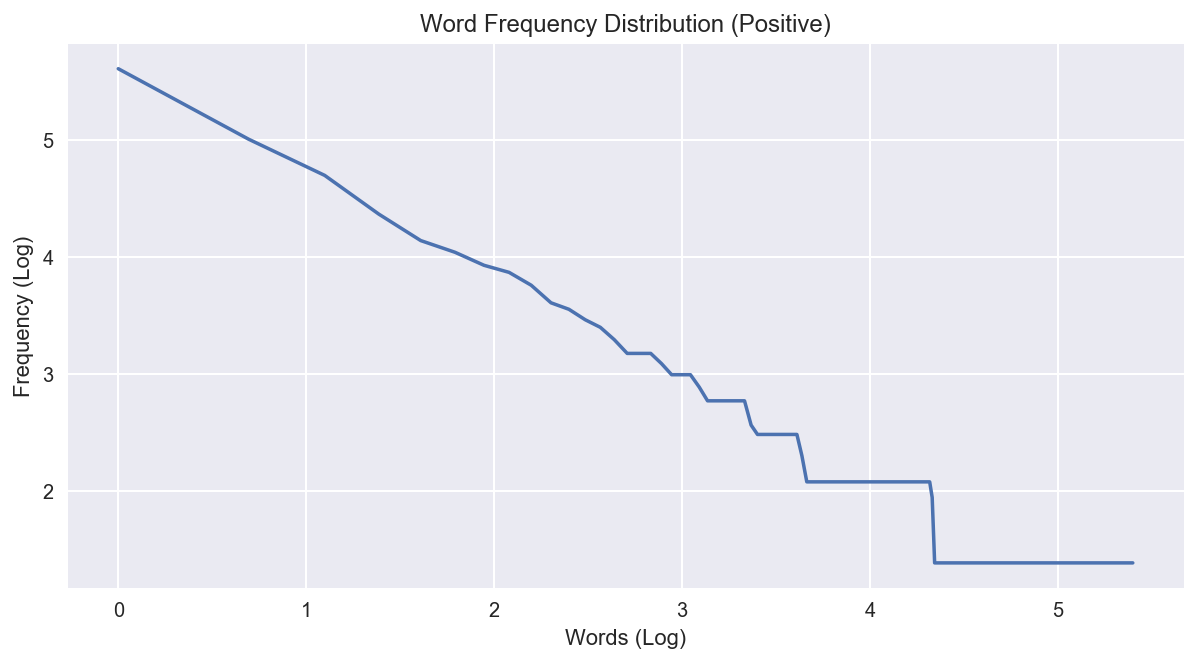

In [28]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [29]:
neg_lines = list(df2[df2.label == -1].headlines)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('streaming', 24),
 ('stream', 14),
 ('live', 11),
 ('come', 10),
 ('dead', 9),
 ('est', 9),
 ('new', 8),
 ('hours', 8),
 ('2', 8),
 ('twitch', 8),
 ('tv', 6),
 ('fortnite', 6),
 ('hi', 5),
 ('5', 5),
 ('next', 5),
 ('first', 5),
 ('3', 5),
 ('playing', 5),
 ('7', 4),
 ('stop', 4)]

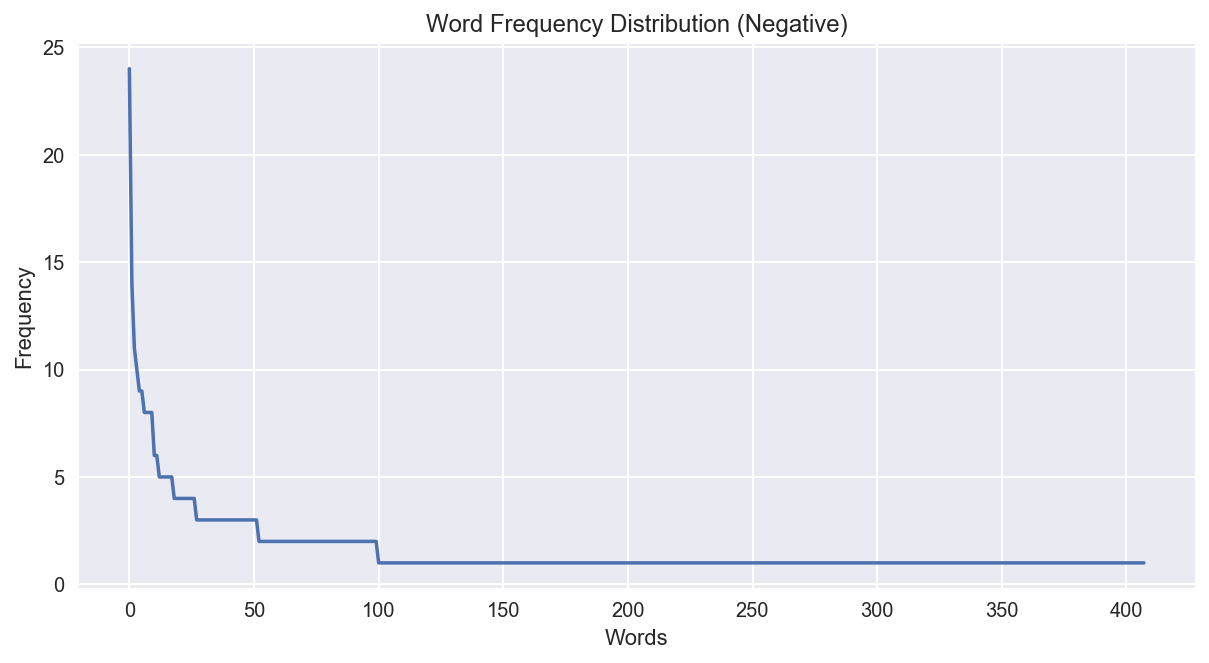

In [30]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

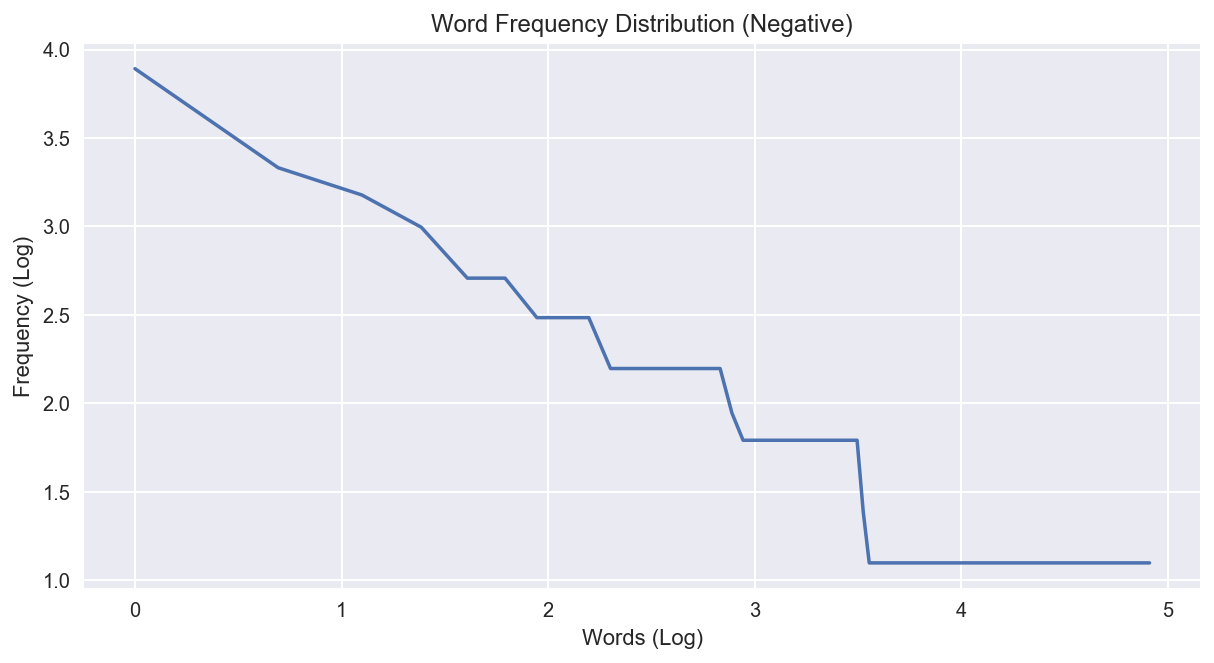

In [31]:

y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [43]:
## Extension 1.2: Network Node Map for Streaming Media from Reddit web scrape data 

In [74]:
import plotly.offline as py
from plotly.graph_objs import *
from operator import itemgetter
import community
import networkx as nx
import colorlover as cl
import numpy as np
import pickle
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from collections import Counter
from operator import itemgetter
import community
from collections import OrderedDict
import re
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
from HTMLParser import HTMLParser
from bs4 import BeautifulSoup

ModuleNotFoundError: No module named 'markupbase'

In [75]:
###Streaming Video
subreddit = reddit.subreddit('BestOfStreamingVideo')
top_subreddit = subreddit.top(limit=500)

In [76]:
for submission in subreddit.top(limit=2):
    print(submission.title, submission.id)

A quick update on the status of the sub. 7hw8t8
Black Panther (2018) 8gfaa9


In [77]:
topics_dict = { "title":[],      
               "score":[], \
               "id":[], "url":[], 
                "comms_num": [], \
                "created": [], \
                "body":[]}

In [78]:
for submission in top_subreddit:
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

In [79]:
topics_data = pd.DataFrame(topics_dict)
topics_data.head()

body  \
0  Hi All,\n\nA few of you have been messaging the mod team wondering why there hasn't been much content here recently. I have had to block many domains and have not added any new domains to the whit...   
1                                                                                                                                                                                                            
2                                                                                                                                                                                                            
3  I have removed every approved domain from the whitelist. \n\nAnyone wishing to apply must do so again. \n\nUse the message the moderators button in the sidebar and send an example of a link you wi...   
4                                                                                                                                                                                                            

   comms_num       created      id  score  \
0         23  1.512570e+09  7hw8t8    199   
1         63  1.525271e+09  8gfaa9    150   
2          2  1.482001e+09  5itzo0    120   
3         82  1.524126e+09  8dakvg    120   
4          1  1.490689e+09  61w1fx    120   

                                      title  \
0  A quick update on the status of the sub.   
1                      Black Panther (2018)   
2                Westworld: Season 1 (2016)   
3                 Whitelist has been reset.   
4         Futurama (All Movies and Seasons)   

                                                                                                      url  
0  https://www.reddit.com/r/BestOfStreamingVideo/comments/7hw8t8/a_quick_update_on_the_status_of_the_sub/  
1                                                      https://azmovies.xyz/watch.php?title=Black+Panther  
2                                                         http://nonton01.com/seasons/westworld-season-1/  
3                 https://www.reddit.com/r/BestOfStreamingVideo/comments/8dakvg/whitelist_has_been_reset/  
4                                           https://www.playnator.com/search/videos?search_query=futurama

In [81]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)
_timestamp = topics_data["created"].apply(get_date)
topics_data = topics_data.assign(timestamp = _timestamp)
#topics_data.to_csv('vidstream.csv') 
#topics_data.sentiment.polarity

In [82]:
with open('vidstream.csv', 'r') as nodecsv:                    
    nodereader = csv.reader(nodecsv) 
    nodes = [n for n in nodereader][1:]                     

node_names = [n[0] for n in nodes]                                    

with open('vidstream.csv', 'r') as edgecsv:                         
    edgereader = csv.reader(edgecsv)                                   
    edges = [tuple(e) for e in edgereader][1:]     
print(len(node_names))

500


In [83]:
print(len(node_names))
print(len(edges))
Gvid = nx.Graph()
Gvid.add_nodes_from(node_names)
Gvid.add_edges_from([(1,2),(1,3)])
density = nx.density(Gvid)
print("Network density:", density)

500
500
Network density: 1.5841207733677617e-05


In [84]:
Gvid.neighbors(1)

[2, 3]

In [85]:
#Gvid.add_edges_from(edges)
print(nx.info(Gvid))

Name: 
Type: Graph
Number of nodes: 503
Number of edges: 2
Average degree:   0.0080


In [106]:
%%html
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [108]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 300, height = 300;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-120)
    .linkDistance(30)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-example").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-example").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link");

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         // The node color depends on the club.
         return color(d.club);
      })
      .call(force.drag);

    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name; });

    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y});

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });
});

<IPython.core.display.Javascript object>

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



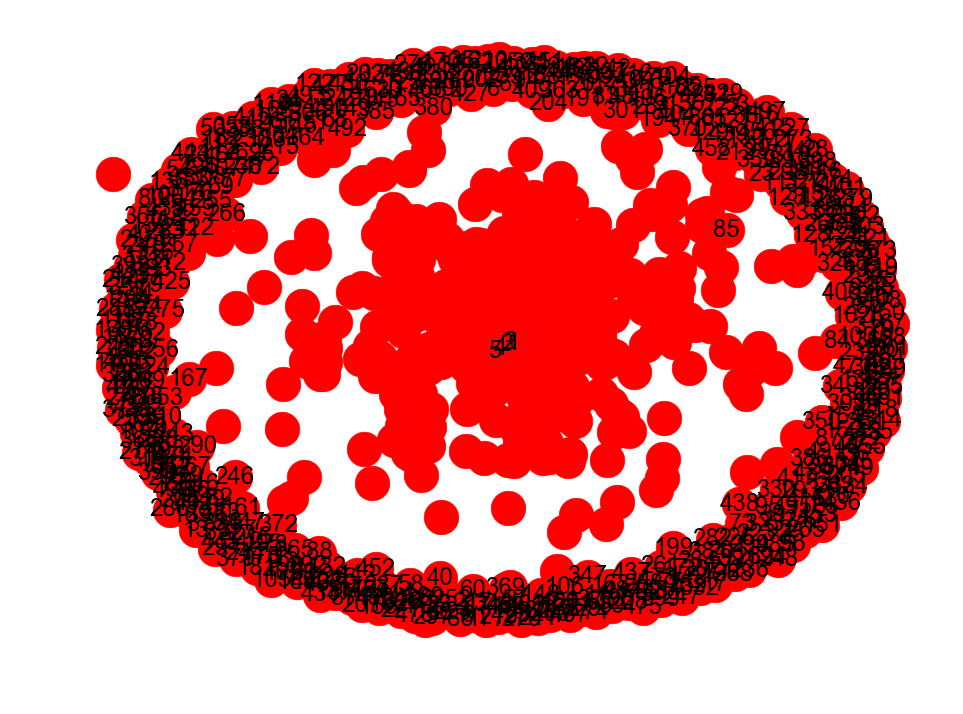

In [109]:
G=Gvid
G.graph
G.add_node(1, score='151')
G.add_nodes_from([3], score='28')
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':4})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4
nx.write_gml(G,"path.to.file")
mygraph=nx.read_gml("path.to.file")
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_spectral(G, ax=ax)
nx.draw_networkx(G, ax=ax)
plt.show()
nx.write_gexf(G, 'Gvid.gexf')

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



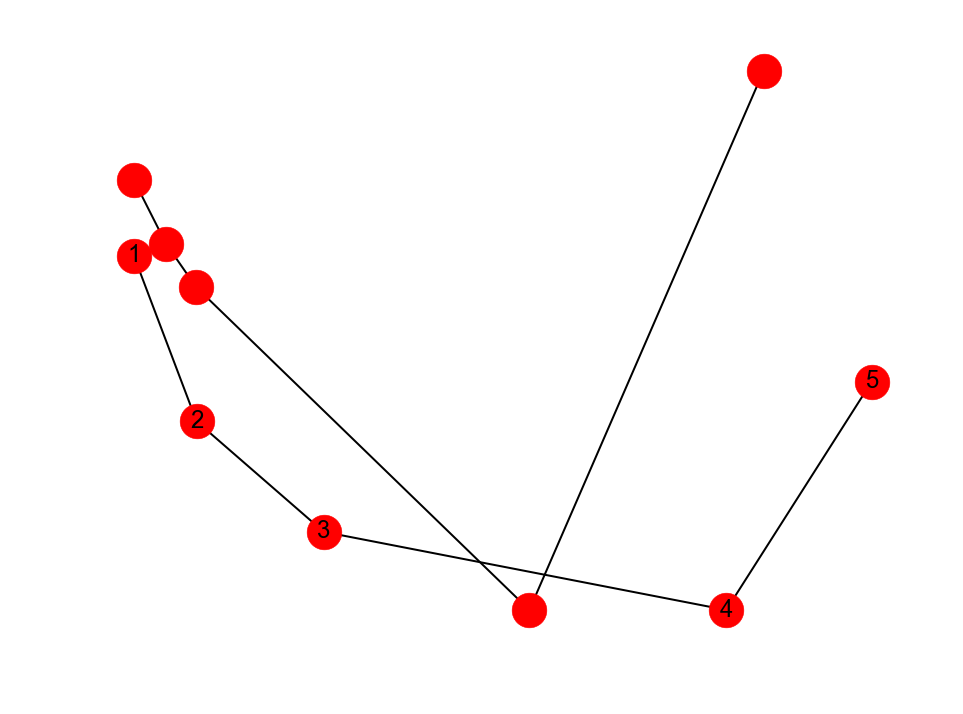

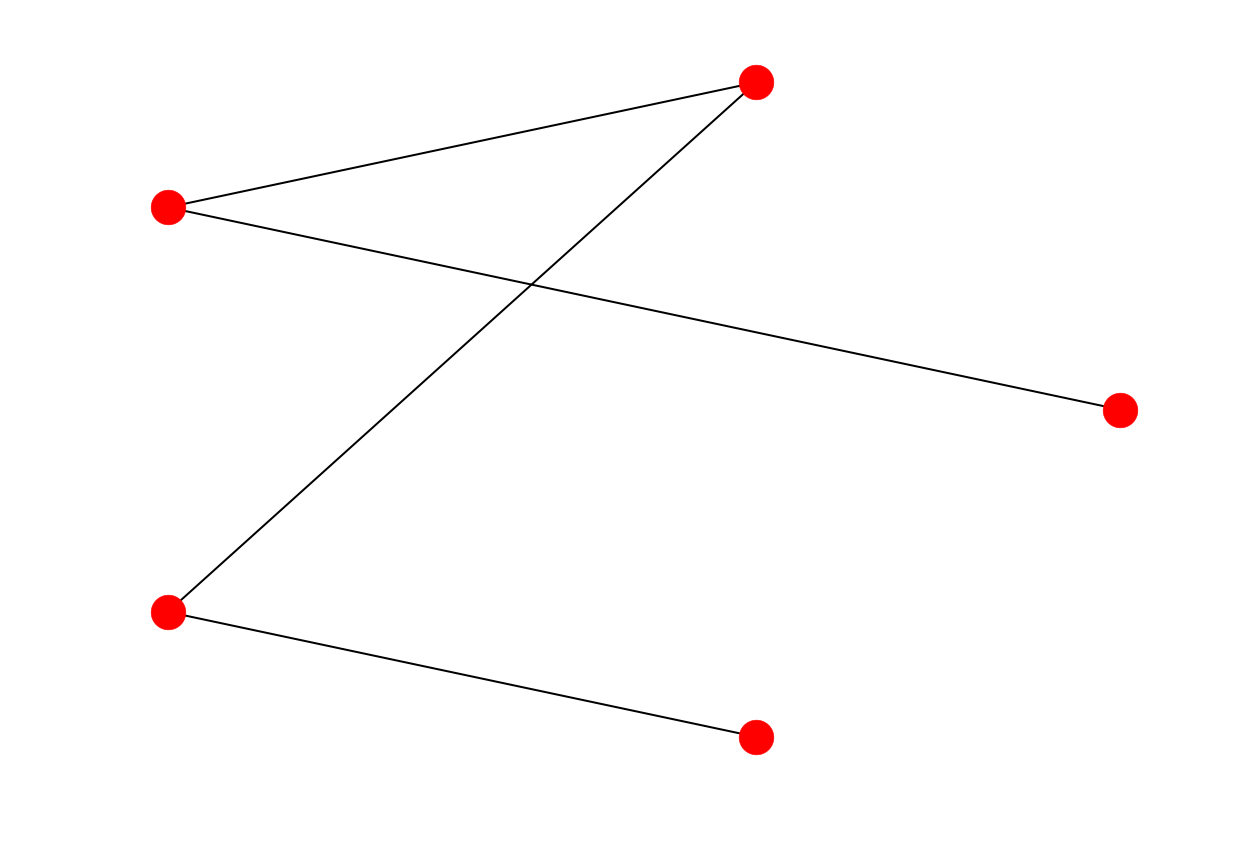

In [110]:
title_sig_dict = {}
score_dict = {}
id_dict = {}
url_dict = {}
comms_num_dict = {}
created_dict = {}
body_dict = {}
for node in nodes:
    title_sig_dict = {}
    score_dict[node[0]] = node[1]
    id_dict[node[0]] = node[2]
    url_dict[node[0]] = node[3]
    comms_num_dict[node[0]] = node[4]
    created_dict[node[0]] = node[5]
    body_dict[node[0]] = node[6]
G = nx.Graph(title="Status")
G.graph
G.add_node(1, score='151')
G.add_nodes_from([3], score='196')
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4
nx.write_gml(G,"path.to.file")
mygraph=nx.read_gml("path.to.file")
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_spectral(G, ax=ax)
nx.draw_networkx(G, ax=ax)
plt.show()
nx.draw_circular(G)
plt.show()
nx.write_gexf(G, 'Gvid.gexf')